In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:\\Users\\Shrita\\Downloads\\ongoing_projects\\Startup\\startup.csv')

In [3]:
df.drop(["Unnamed: 0","Unnamed: 6","id","state_code.1","latitude","longitude","zip_code","city","name",
       "closed_at","founded_at","first_funding_at","last_funding_at","object_id"], axis=1, inplace=True)

df.head(3)

,state_code,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,1,0,0,0,0,1.00,0,acquired
1,CA,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,1,0,0,1,1,1,4.75,1,acquired
2,CA,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,0,0,1,0,0,0,4.00,1,acquired


In [4]:
df=pd.get_dummies(df, columns=["status"], drop_first=True)
df.head(2)

,state_code,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_closed
0,CA,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,1,0,0,0,0,1.00,0,0
1,CA,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,1,0,0,1,1,1,4.75,1,0


In [5]:
df.isnull().sum().sort_values(ascending=False).head(7)

# we have missing values only in 2 columns. let's fill it

age_first_milestone_year    152
age_last_milestone_year     152
status_closed                 0
milestones                    0
is_otherstate                 0
is_TX                         0
is_MA                         0
dtype: int64

In [6]:
df.drop(['age_first_milestone_year','age_last_milestone_year'], axis=1, inplace=True)

df.head(3)

,state_code,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_closed
0,CA,1,2.2493,3.0027,3,3,375000,3,1,0,...,1,0,1,0,0,0,0,1.00,0,0
1,CA,1,5.1260,9.9973,9,4,40100000,1,1,0,...,0,1,0,0,1,1,1,4.75,1,0
2,CA,1,1.0329,1.0329,5,1,2600000,2,1,0,...,0,0,0,1,0,0,0,4.00,1,0


In [7]:
from sklearn import preprocessing

categorical = ['category_code','state_code']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        df[feature] = le.fit_transform(df[feature])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_code              923 non-null    int32  
 1   labels                  923 non-null    int64  
 2   age_first_funding_year  923 non-null    float64
 3   age_last_funding_year   923 non-null    float64
 4   relationships           923 non-null    int64  
 5   funding_rounds          923 non-null    int64  
 6   funding_total_usd       923 non-null    int64  
 7   milestones              923 non-null    int64  
 8   is_CA                   923 non-null    int64  
 9   is_NY                   923 non-null    int64  
 10  is_MA                   923 non-null    int64  
 11  is_TX                   923 non-null    int64  
 12  is_otherstate           923 non-null    int64  
 13  category_code           923 non-null    int32  
 14  is_software             923 non-null    in

In [9]:
X2 = df[['labels','is_top500','milestones','has_roundB','avg_participants','funding_rounds','has_roundA']]
y2 = df['status_closed']

In [10]:
X2.shape

(923, 7)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[174   5]
 [ 19  79]]


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9133574007220217

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[179   0]
 [  0  98]]


In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[179   0]
 [  0  98]]


In [16]:
X2.shape

(923, 7)

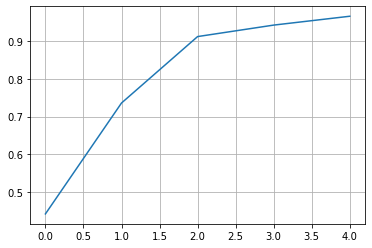

In [17]:
X=StandardScaler().fit_transform(X2)

pca=PCA(n_components=5)

X_pca=pca.fit_transform(X2)
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(exp_var)
cumsum_var
plt.plot(cumsum_var)
plt.grid()

,0,1
0,-0.880027,-1.091224
1,1.120955,1.118664
2,0.250430,0.732618


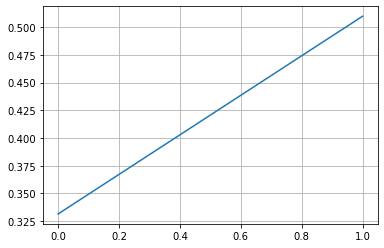

In [18]:
pca_new=PCA(n_components=2)
X_new=pca_new.fit_transform(X)

exp_var_new=pca_new.explained_variance_ratio_
cumsum_var_new=np.cumsum(exp_var_new)

plt.plot(cumsum_var_new)
plt.grid()
X_new=pd.DataFrame(X_new)
X_new.head(3)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y2, test_size = 0.3, random_state = 0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


[[170   9]
 [ 30  68]]


0.8592057761732852

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


[[162  17]
 [ 35  63]]


0.8122743682310469

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[171   8]
 [ 15  83]]


0.9169675090252708